In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
import os

os.getcwd()

'/home/kevinhav/projects/flight_numbers'

In [3]:
fn_path= Path('data/raw/colin_kuskie_flight_numbers.csv')
dims_path = Path('data/raw/pdga-approved-disc-golf-discs_2023-09-07T18-20-28.csv')

In [4]:
fn_cols_to_keep = ['Name', 'Speed', 'Glide', 'Turn', 'Fade']

dims_cols_to_keep = ['Manufacturer / Distributor', 'Disc Model', 
       'Diameter (cm)', 'Height (cm)', 'Rim Depth (cm)',
       'Inside Rim Diameter (cm)', 'Rim Thickness (cm)',
       'Rim Depth / Diameter Ratio (%)', 'Rim Configuration',
       'Flexibility (kg)']

X_cols = ['Diameter (cm)','Height (cm)', 'Rim Depth (cm)',
       'Inside Rim Diameter (cm)', 'Rim Thickness (cm)',
       'Rim Depth / Diameter Ratio (%)', 'Rim Configuration',
       'Flexibility (kg)']

#y_cols = ['Speed', 'Glide', 'Turn', 'Fade']
y_cols = ['Speed']

In [5]:
def get_data(fn_path, dims_path):
    df_flight_nums = pd.read_csv(fn_path, usecols=fn_cols_to_keep, dtype={'Name':'category', 'Speed':'category', 'Glide':'category', 'Turn':'category', 'Fade':'category', 'Brand':'category', 'Manufacturer': 'category'})
    df_disc_dims = pd.read_csv(dims_path, usecols=dims_cols_to_keep, dtype={'Manufacturer / Distributor':'category', 'Disc Model':'category', 'Max Weight (gr)':'float32', 'Diameter (cm)':'float32', 'Height (cm)':'float32', 'Height (cm)': 'float32', 'Rim Depth (cm)':'float32', 'Rim Thickness (cm)':'float32', 'Rim Depth / Diameter Ratio (%)':'float32', 'Rim Configuration':'float32', 'Flexibility (kg)':'float32'})

    return df_flight_nums, df_disc_dims


In [6]:
def merge_data(left_df, right_df):
    return pd.merge(how='inner', left=left_df, left_on='Disc Model', right=right_df, right_on='Name')
    

In [7]:
def transform_data(df:pd.DataFrame):
    df.drop('Name', axis=1, inplace=True)
    
    return df

In [8]:
def get_features(df: pd.DataFrame, X_cols: list):
    return df[X_cols]

In [9]:
def get_target(df: pd.DataFrame, y_cols: list):
    return df[y_cols]

In [10]:
def split_data(X, y):
    
    return train_test_split(X, y, test_size=0.2)

In [11]:
df_fn, df_dims = get_data(fn_path, dims_path)

df = merge_data(df_dims, df_fn)

df = transform_data(df)

In [12]:
X = get_features(df, X_cols)

y = get_target(df, y_cols)

X_train, X_test, y_train, y_test = split_data(X, y)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    solver = 'lbfgs',
    alpha = 1e-5,
    hidden_layer_sizes = (5, 2),
    random_state = 42,
)

clf.fit(X_train, y_train)

/home/kevinhav/projects/flight_numbers/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kevinhav/projects/flight_numbers/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [23]:
y_pred = clf.predict(X_test)

Accuracy:  0.5675675675675675


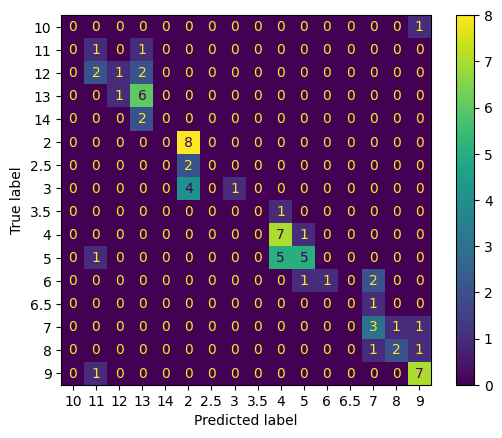

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay


print('Accuracy: ', clf.score(X_test, y=y_test))
ConfusionMatrixDisplay.from_predictions(np.ravel(y_test), np.ravel(y_pred))

In [41]:
df.loc[df['Disc Model'] == 'Roc']

,Manufacturer / Distributor,Disc Model,Diameter (cm),Height (cm),Rim Depth (cm),Inside Rim Diameter (cm),Rim Thickness (cm),Rim Depth / Diameter Ratio (%),Rim Configuration,Flexibility (kg),Speed,Glide,Turn,Fade
365,Innova Champion Discs,Roc,21.700001,2.0,1.3,19.3,1.2,6.0,43.0,8.51,4,4,0,3


In [32]:
X_test

array([[-0.22301784, -1.24117434, -0.32847156, -0.70099792,  0.75885741,
        -0.25750878, -0.68920363,  0.40183701],
       [-1.16644361, -1.24117434, -0.32847156, -1.5272075 ,  1.37234305,
        -0.25750878, -0.80972203,  0.11982078],
       [-1.16644361,  0.1569299 , -0.32847156, -0.60919686,  0.34986739,
        -0.25750878,  0.15442518, -0.09292857],
       [-0.22301784, -1.24117434, -1.03855046, -0.88460005,  0.96335278,
        -1.02068976, -0.87858969,  1.08461357],
       [-1.16644361,  0.62296483,  1.80176429,  1.22682443, -1.4905883 ,
         1.87939812,  1.72116441,  0.57005738],
       [-0.69473073, -0.30910448, -0.32847156, -1.06820218,  1.16784767,
        -0.25750878, -0.74085437,  0.96092217],
       [ 1.6638247 , -0.77513941, -0.32847156,  0.58421698, -0.26361776,
        -0.41014483, -0.44816683, -0.49368843],
       [-0.69473073,  1.55503414,  1.80176429,  1.22682443, -1.4905883 ,
         1.87939812,  2.49592556, -2.40348363],
       [-0.69473073,  0.1569299 

In [46]:
tone_salt = [[21.1, 1.7, 1.1, 16.5, 2.3, 5.2, 27.0, 12.05]]

salt = [[21.0, 1.7, 1.1, 16.4, 2.3, 5.2, 27, 10.68]]

clf.predict(scaler.transform(salt))

/home/kevinhav/projects/flight_numbers/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['13'], dtype='<U4')